In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from pandasgui import show
import  warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore', category=FutureWarning)
import matplotlib.cm as cm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
import shap
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, log_loss, matthews_corrcoef, cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from IPython.display import display, HTML
import lime
import lime.lime_tabular
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### INDÍCES DE STRESS

In [58]:
# Passo 1: Carregar BASE ANTONIO
ANTONIO = pd.read_csv(r"C:\Users\CLIENTE\Downloads\TCC WERNER\BASES\BANCO_ANTONIO.csv", sep=';')
# Passo 2: Carregar BASE MENINAS
MENINAS = pd.read_csv(r"C:\Users\CLIENTE\Downloads\TCC WERNER\BASES\BANCO_MENINAS.csv", sep=';')

# SÉRIES TEMPORAIS:

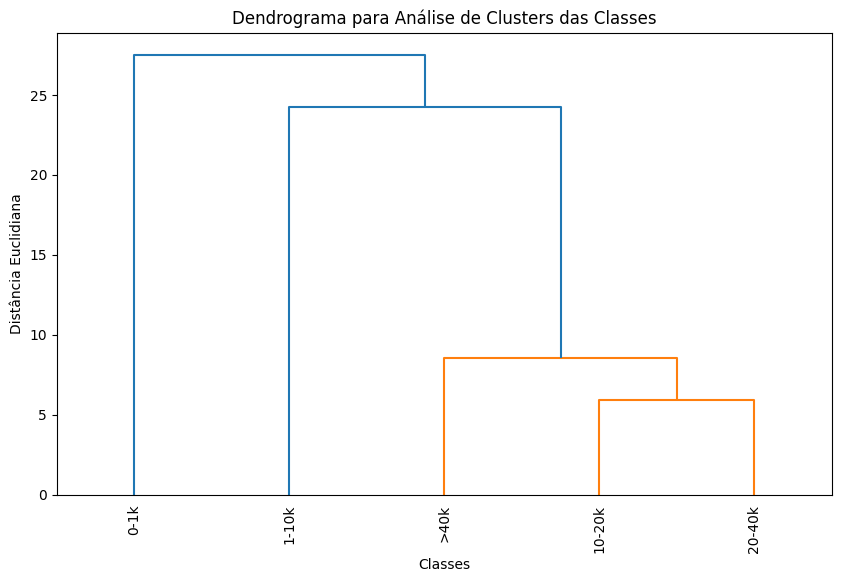

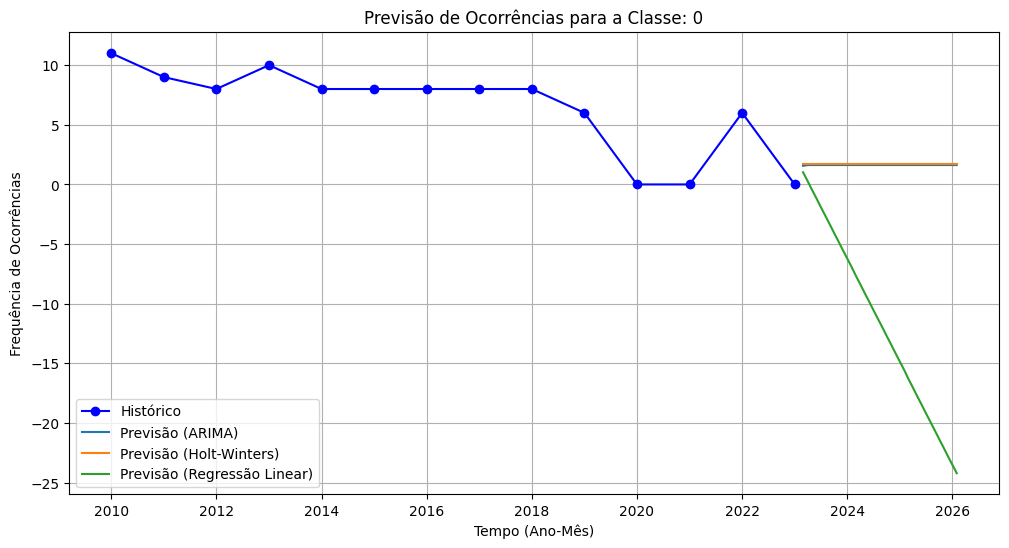

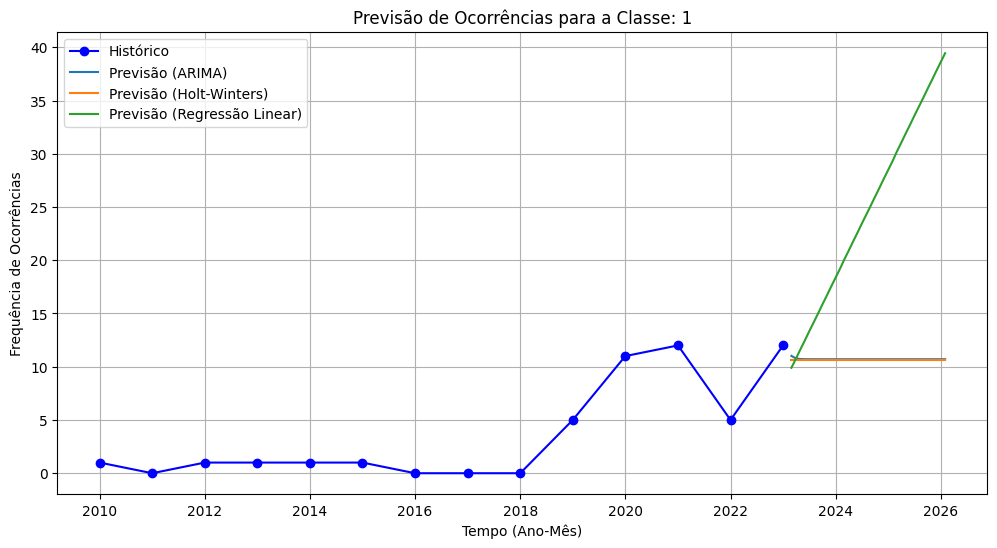

c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


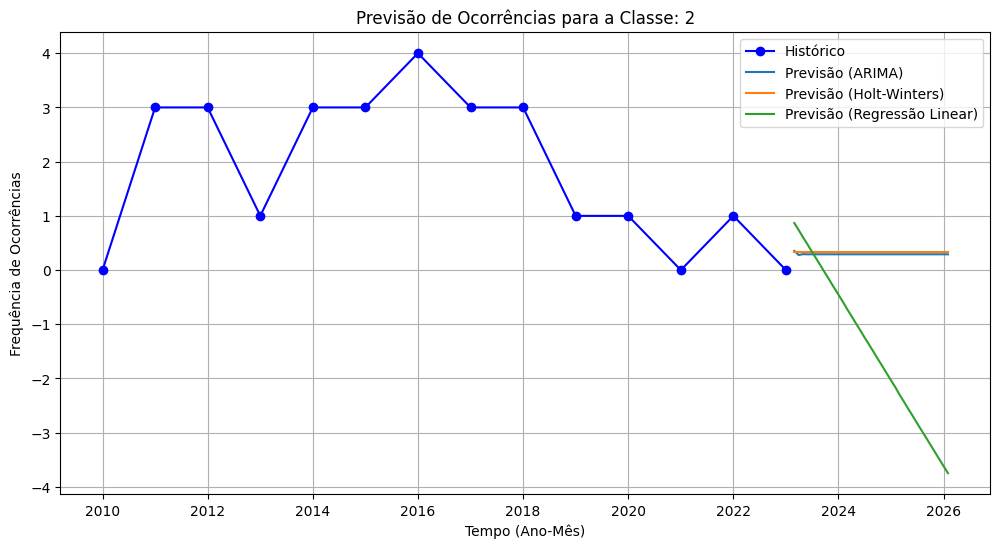

c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


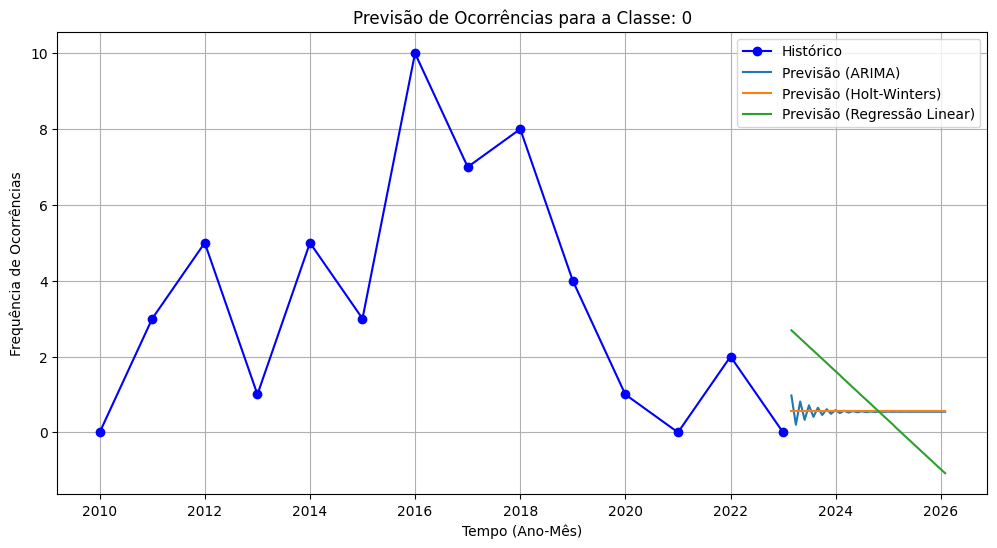

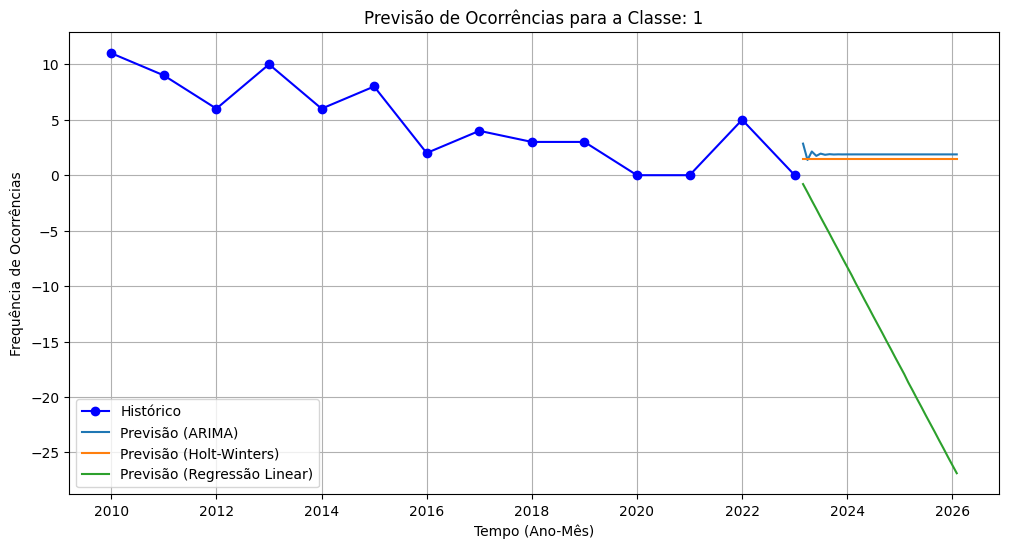

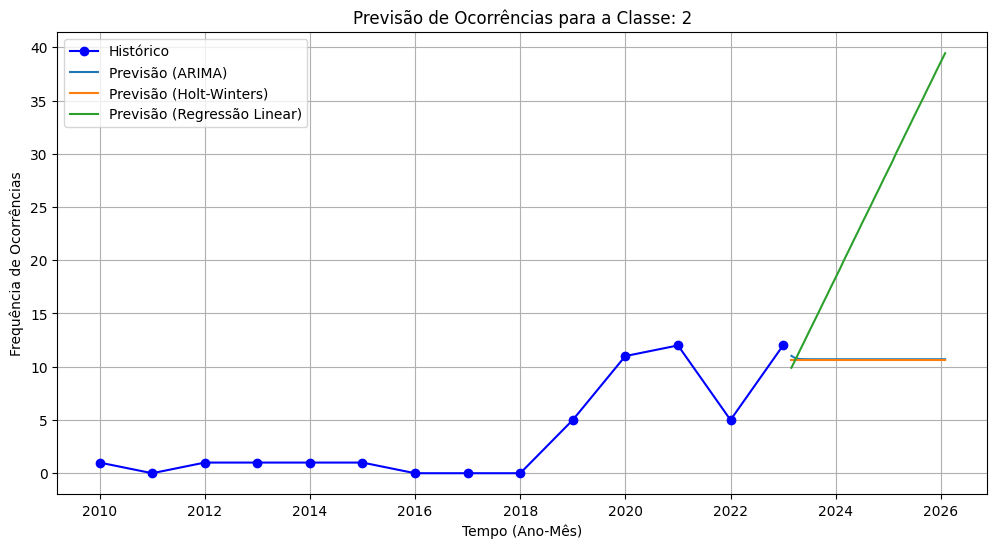

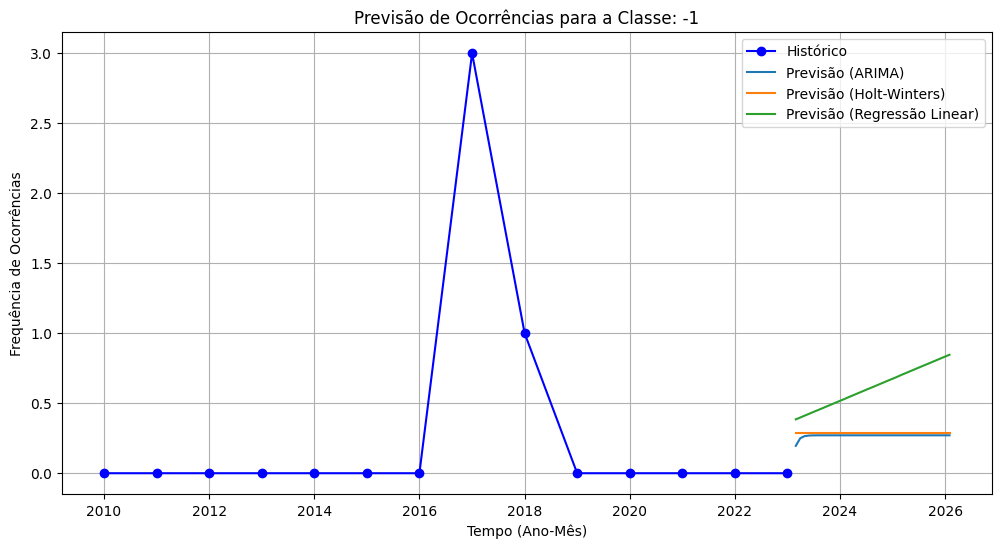

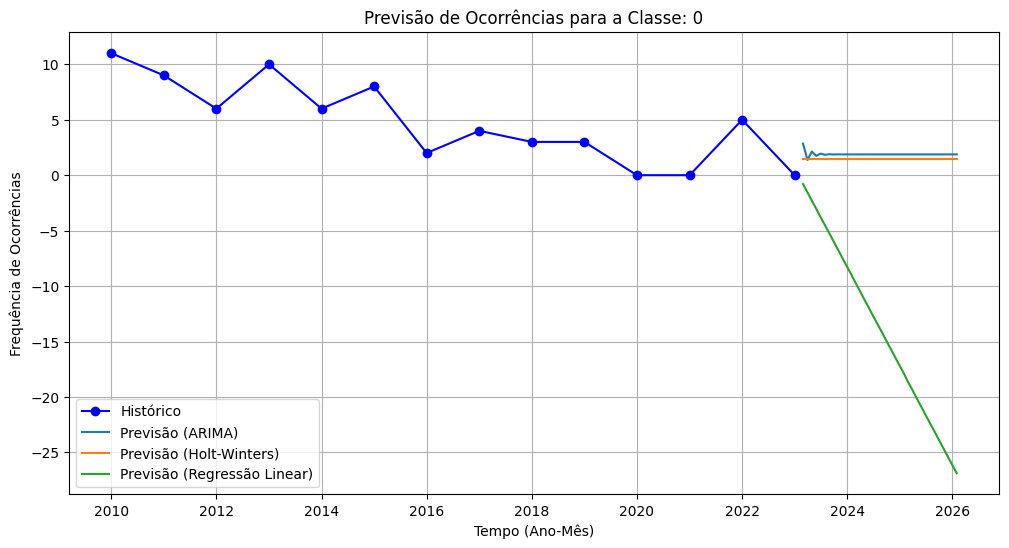

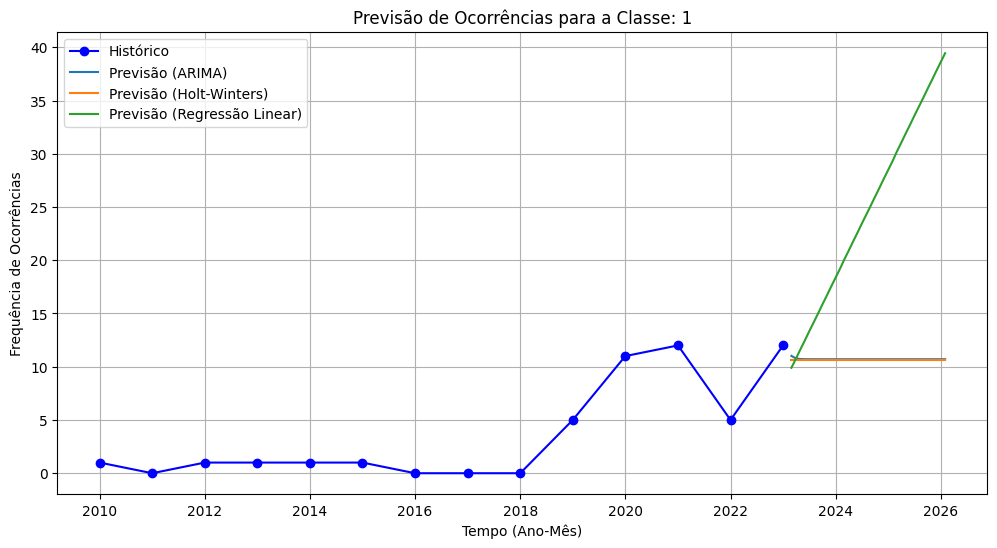

c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


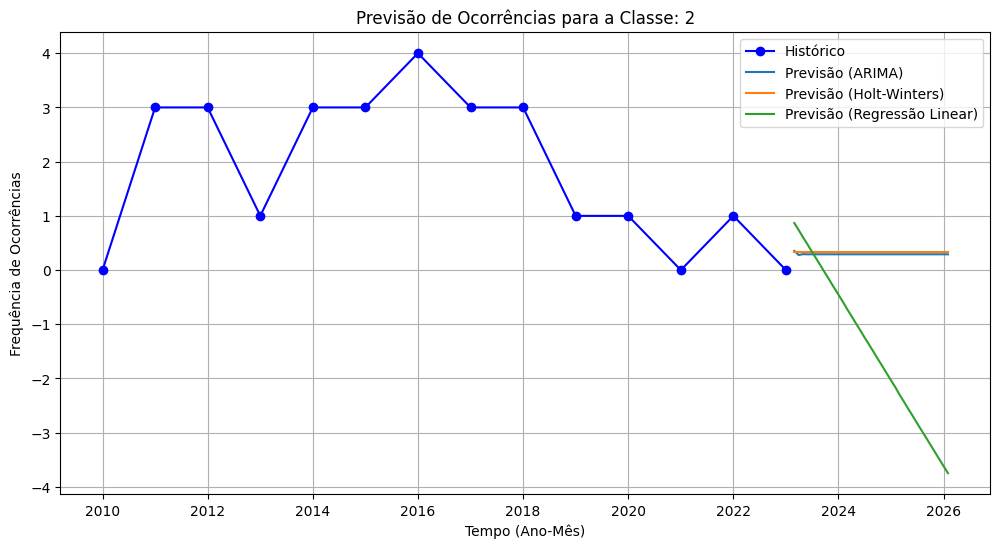

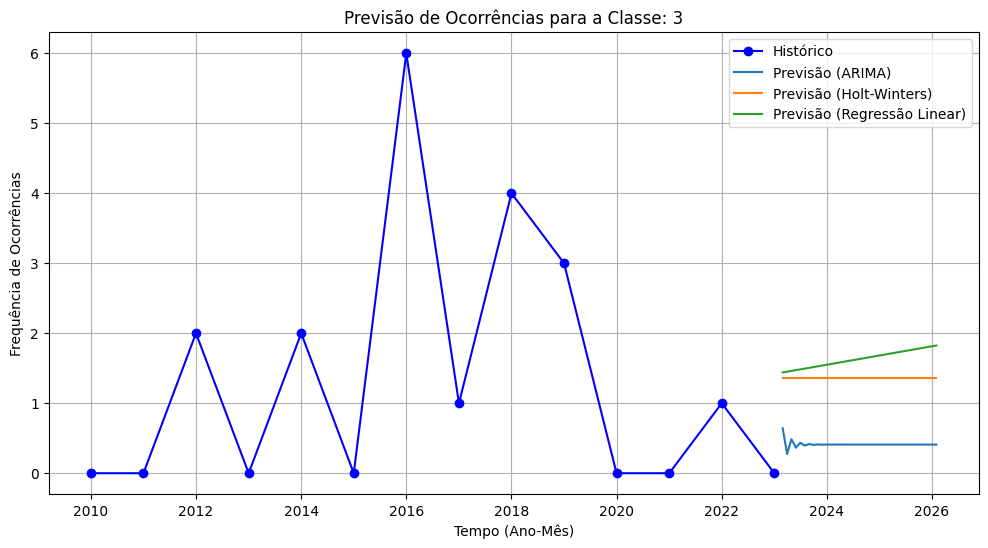

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from fpdf import FPDF
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="joblib.externals.loky.backend.context")



# Função para exportar um relatório em PDF com informações das variáveis categóricas originais
def gerar_pdf_categoricos(categoricos_originais, salvar_diretorio):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Relatório de Variáveis Categóricas Originais", ln=True, align='C')
    for i, valor in enumerate(categoricos_originais):
        pdf.cell(200, 10, txt=f"{i+1}: {valor}", ln=True)
    pdf.output(os.path.join(salvar_diretorio, "Relatorio_Variaveis_Categoricas.pdf"))

# Função para visualizar séries temporais
def visualizar_series_temporais(df, coluna_tempo, coluna_objetivo, labels):
    df = df.sort_values(by=coluna_tempo).reset_index(drop=True)
    df['Tempo Ajustado'] = df[coluna_tempo].dt.strftime('%m/%Y')
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=df, x='Tempo Ajustado', y=coluna_objetivo, hue=labels, palette='tab10')
    plt.title('Série Temporal com Clusters', fontsize=14)
    plt.xlabel('Tempo (Mês/Ano)', fontsize=12)
    plt.ylabel(coluna_objetivo, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.legend(title='Cluster', fontsize=12)
    plt.tight_layout()
    plt.show()

# Função para análise e clusterização de dados
def cluster_dados(df, coluna_tempo, coluna_objetivo, tipo_variavel='numerica', num_clusters=3, metodo='kmeans', salvar_diretorio=None):
    df[coluna_tempo] = pd.to_datetime(df[coluna_tempo])
    df = df.sort_values(by=coluna_tempo).reset_index(drop=True)

    if tipo_variavel == 'categórica':
        categoricos_originais = df[coluna_objetivo].copy()
        encoder = OneHotEncoder(sparse_output=False)
        X = encoder.fit_transform(df[[coluna_objetivo]])
        if salvar_diretorio:
            os.makedirs(salvar_diretorio, exist_ok=True)
            gerar_pdf_categoricos(categoricos_originais, salvar_diretorio)
    else:
        X = df[[coluna_objetivo]].values
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    if metodo == 'kmeans':
        modelo = KMeans(n_clusters=num_clusters, random_state=42)
        df['AnoMes'] = df[coluna_tempo].dt.to_period('M')
        ocorrencias = df.groupby(['AnoMes', coluna_objetivo]).size().unstack(fill_value=0)
        plt.figure(figsize=(10, 6))
        Z = linkage(ocorrencias.T, method='ward')  # Transposição para que cada classe seja um ponto
        dendrogram(Z, labels=ocorrencias.columns, leaf_rotation=90, leaf_font_size=10)
        plt.title('Dendrograma para Análise de Clusters das Classes')
        plt.xlabel('Classes')
        plt.ylabel('Distância Euclidiana')
        plt.grid(False)
        if salvar_diretorio:
            plt.savefig(os.path.join(salvar_diretorio, "Dendrograma.png"), dpi=300)
        plt.show()
    elif metodo == 'agglomerative':
        modelo = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    elif metodo == 'dbscan':
        modelo = DBSCAN(eps=0.5, min_samples=5)
    else:
        raise ValueError("Método não reconhecido. Escolha entre 'kmeans', 'agglomerative', ou 'dbscan'.")
    labels = modelo.fit_predict(X)
    df['Cluster'] = labels
    metrics = {}
    if metodo != 'dbscan':
        metrics['Silhouette Score'] = silhouette_score(X, labels)
        metrics['Calinski-Harabasz Score'] = calinski_harabasz_score(X, labels)
        if metodo == 'kmeans':
            metrics['Inertia'] = modelo.inertia_
    if salvar_diretorio:
        plt.figure(figsize=(10, 6))
        Z = linkage(X, method='ward')
        dendrogram(Z)
        plt.title('Dendrograma')
        plt.xlabel('Amostras')
        plt.ylabel('Distância Euclidiana')
        plt.savefig(os.path.join(salvar_diretorio, f"Dendrograma_{metodo}.png"), dpi=300)
        plt.close()
    return df, metrics

# Função para analisar e prever ocorrências
def analisar_e_prever_ocorrencias(df, coluna_tempo, coluna_categorica, salvar_diretorio=None, meses_previsao=12):
    df[coluna_tempo] = pd.to_datetime(df[coluna_tempo], dayfirst=True)
    df['AnoMes'] = df[coluna_tempo].dt.to_period('M')
    frequencias = df.groupby(['AnoMes', coluna_categorica]).size().unstack(fill_value=0)
    previsoes = {}
    for classe in frequencias.columns:
        serie = frequencias[classe]
        serie.index = serie.index.to_timestamp()
        previsao_resultados = {}
        try:
            arima_model = ARIMA(serie, order=(1, 1, 1))
            arima_fit = arima_model.fit()
            arima_forecast = arima_fit.forecast(steps=meses_previsao)
            previsao_resultados['ARIMA'] = arima_forecast
        except Exception as e:
            print(f"Erro no ARIMA para a classe {classe}: {e}")
        try:
            hw_model = ExponentialSmoothing(serie, seasonal=None)
            hw_fit = hw_model.fit()
            hw_forecast = hw_fit.forecast(steps=meses_previsao)
            previsao_resultados['Holt-Winters'] = hw_forecast
        except Exception as e:
            print(f"Erro no Holt-Winters para a classe {classe}: {e}")
        try:
            X = np.arange(len(serie)).reshape(-1, 1)
            y = serie.values
            model = LinearRegression()
            model.fit(X, y)
            X_future = np.arange(len(serie), len(serie) + meses_previsao).reshape(-1, 1)
            linear_forecast = model.predict(X_future)
            previsao_resultados['Regressão Linear'] = linear_forecast
        except Exception as e:
            print(f"Erro na Regressão Linear para a classe {classe}: {e}")
        previsoes[classe] = previsao_resultados
        plt.figure(figsize=(12, 6))
        plt.plot(serie, label="Histórico", color="blue", marker='o')
        for metodo, forecast in previsao_resultados.items():
            plt.plot(pd.date_range(start=serie.index[-1] + pd.offsets.MonthBegin(1), periods=meses_previsao, freq='ME'), 
                     forecast, label=f"Previsão ({metodo})")
        plt.title(f'Previsão de Ocorrências para a Classe: {classe}')
        plt.xlabel('Tempo (Ano-Mês)')
        plt.ylabel('Frequência de Ocorrências')
        plt.legend()
        plt.grid(True)
        if salvar_diretorio:
            os.makedirs(salvar_diretorio, exist_ok=True)
            plt.savefig(os.path.join(salvar_diretorio, f"Previsao_{classe}.png"), dpi=300)
        plt.show()
    if salvar_diretorio:
        previsoes_df = pd.concat({classe: pd.DataFrame(previsao) for classe, previsao in previsoes.items()}, axis=1)
        previsoes_df.to_csv(os.path.join(salvar_diretorio, "Previsoes_Frequencia_Classes.csv"))
    return frequencias, previsoes


var = 'categórica'
if var == 'numérica':
    obj = 'Cianobactérias'
    clt = 9
else:
    obj = 'Classe'
    clt = 3

MENINAS = pd.read_csv(r"C:\Users\CLIENTE\Downloads\TCC WERNER\BASES\BANCO_MENINAS.csv", sep=';')
df_resultado_K, metrics_K = cluster_dados(MENINAS, coluna_tempo='DATA', coluna_objetivo=obj, tipo_variavel=var, num_clusters=clt, metodo='kmeans', salvar_diretorio=r"C:\Users\CLIENTE\Downloads\TCC WERNER\CÓDIGOS\SERIES_TEMPORAIS") # Usando K-means
df_resultado_AC, metrics_AC = cluster_dados(MENINAS, coluna_tempo='DATA', coluna_objetivo=obj, tipo_variavel=var, num_clusters=clt, metodo='agglomerative', salvar_diretorio=r"C:\Users\CLIENTE\Downloads\TCC WERNER\CÓDIGOS\SERIES_TEMPORAIS") # Usando Agglomerative Clusterin2
df_resultado_DB, metrics_DB = cluster_dados(MENINAS, coluna_tempo='DATA', coluna_objetivo=obj, tipo_variavel=var, metodo='dbscan', salvar_diretorio=r"C:\Users\CLIENTE\Downloads\TCC WERNER\CÓDIGOS\SERIES_TEMPORAIS") # Usando DBSCAN

df_res = 1
if df_res == 1:
    dfs = [df_resultado_K, df_resultado_AC, df_resultado_DB]
    dfs_var = 'Cluster'
elif df_res == 2:
    dfs = [df_resultado_K, df_resultado_AC, df_resultado_DB]
    dfs_var = 'Classe'
else:
    dfs = [MENINAS, MENINAS, MENINAS]
    dfs_var = 'Cianobactérias'

frequencias_K, previsoes_K = analisar_e_prever_ocorrencias(dfs[0], coluna_tempo='DATA', coluna_categorica=dfs_var, salvar_diretorio=r"C:\Users\CLIENTE\Downloads\TCC WERNER\CÓDIGOS\SERIES_TEMPORAIS", meses_previsao=36)
frequencias_AC, previsoes_AC = analisar_e_prever_ocorrencias(dfs[1], coluna_tempo='DATA', coluna_categorica=dfs_var, salvar_diretorio=r"C:\Users\CLIENTE\Downloads\TCC WERNER\CÓDIGOS\SERIES_TEMPORAIS", meses_previsao=36)
frequencias_DB, previsoes_DB = analisar_e_prever_ocorrencias(dfs[2], coluna_tempo='DATA', coluna_categorica=dfs_var, salvar_diretorio=r"C:\Users\CLIENTE\Downloads\TCC WERNER\CÓDIGOS\SERIES_TEMPORAIS", meses_previsao=36)

### FREQUÊNCIA

Top 10 classes com maior frequência de ocorrência:
Classe
1-10k     67
0-1k      50
10-20k    26
dtype: int64


<Figure size 1200x800 with 0 Axes>

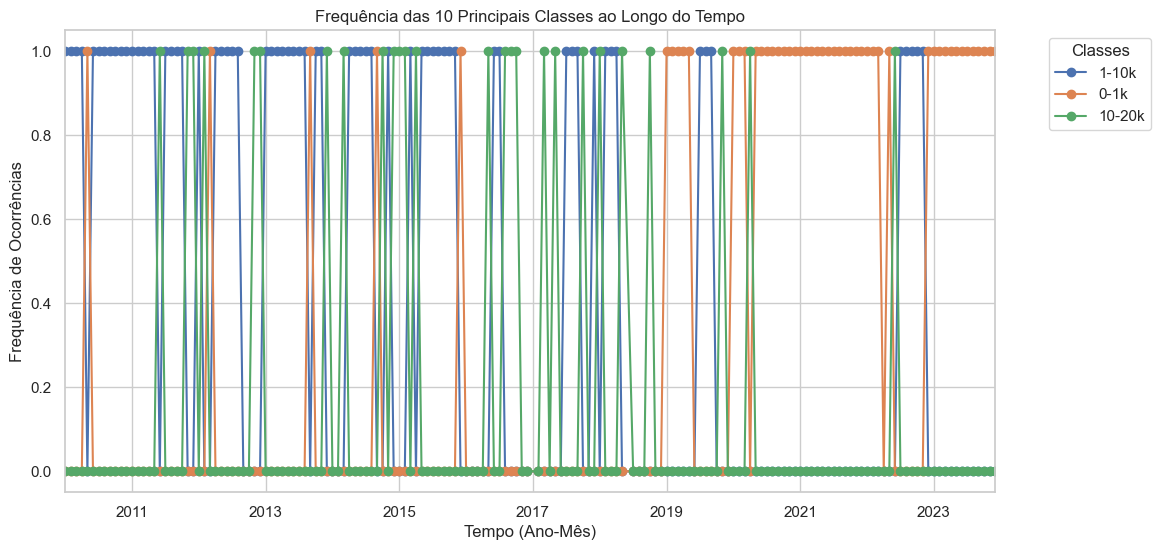

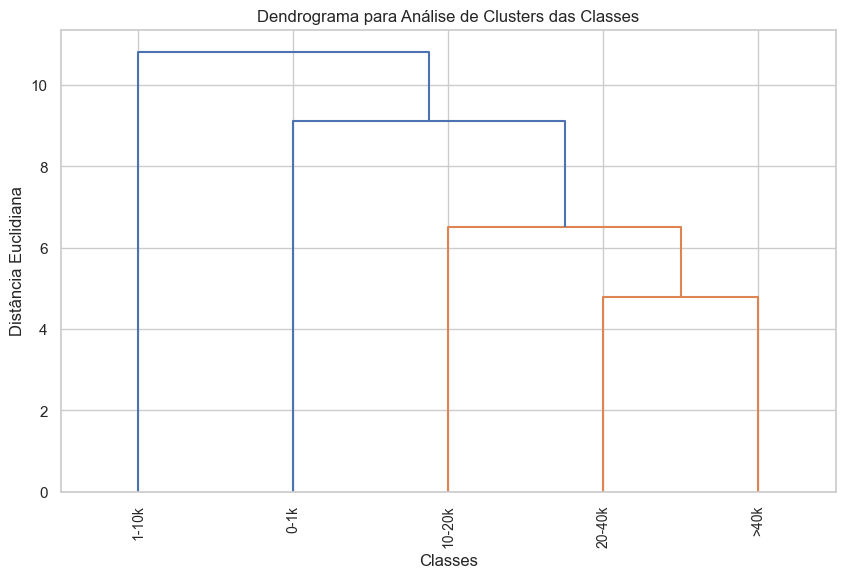

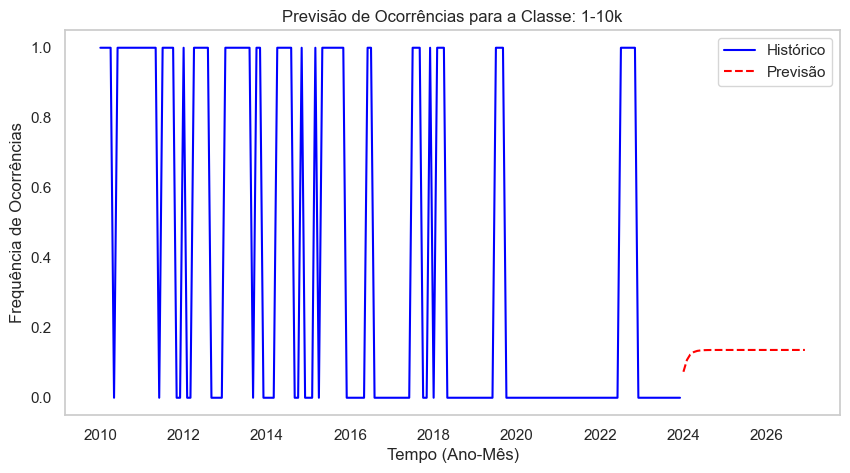

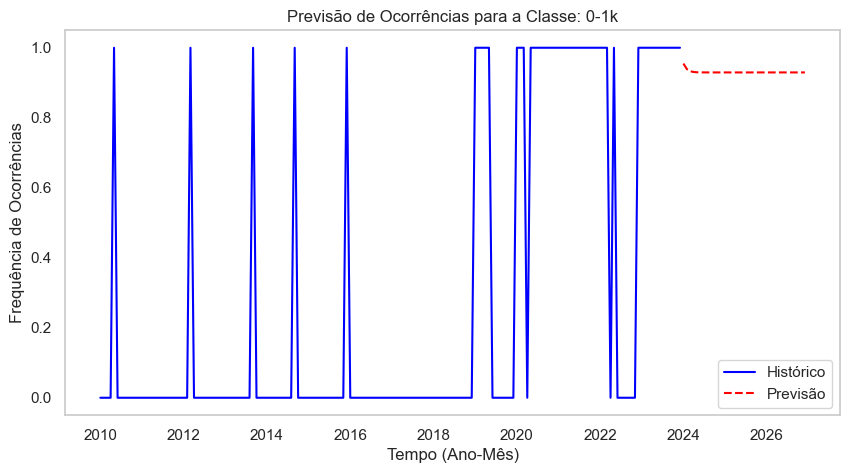

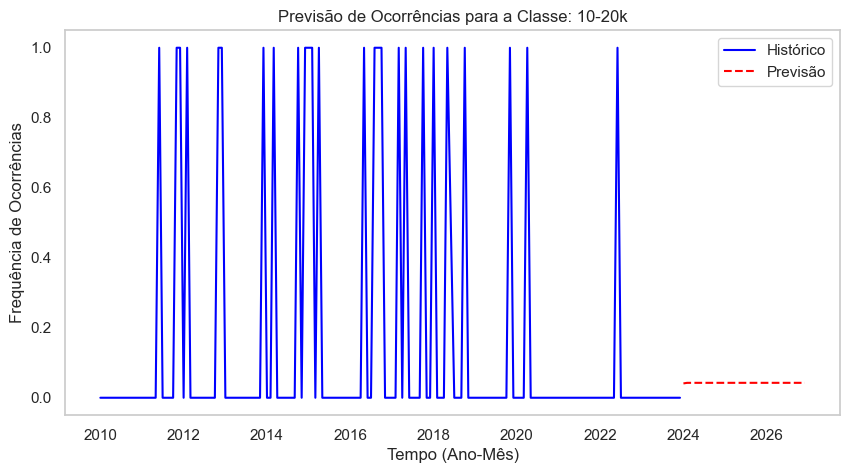

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.tsa.arima.model import ARIMA
import os

# Função para analisar e prever a frequência futura das classes de ocorrências
def analisar_e_prever_ocorrencias(df, coluna_tempo, coluna_categorica, salvar_diretorio=None, meses_previsao=12):
    # Converter a coluna de tempo para datetime
    df[coluna_tempo] = pd.to_datetime(df[coluna_tempo], dayfirst=True, infer_datetime_format=True)
    # Verificar valores nulos ou inconsistências na coluna de classe
    df = df[(df[coluna_categorica].notna()) & (df[coluna_tempo].notna())]
    
    # Previsão de ocorrências futuras das 10 classemais frequentes usando ARIMA
    previsoes = {}
    for classe in top_10.index:
        serie = ocorrencias[classe]
        # Ajustar o modelo ARIMA para a série temporal da classe
        model = ARIMA(serie, order=(1, 1, 1))  # Parâmetros (p,d,q) simples
        model_fit = model.fit()
        # Fazer previsão para os próximos meses
        forecast = model_fit.forecast(steps=meses_previsao)
        previsoes[classe] = forecast
        # Substituir caracteres inválidos no nome da classe
        nome_limpo = str(classe).replace(">", "maior_").replace("<", "menor_").replace("/", "_").replace(" ", "_")
        # Plotar os resultados da previsão
        plt.figure(figsize=(10, 5))
        plt.plot(serie.index.to_timestamp(), serie, label="Histórico", color="blue")
        plt.plot(pd.date_range(start=serie.index[-1].start_time, periods=meses_previsao, freq='M'),
                 forecast, label="Previsão", color="red", linestyle="--")
        plt.title(f'Previsão de Ocorrências para a Classe: {classe}')
        plt.xlabel('Tempo (Ano-Mês)')
        plt.ylabel('Frequência de Ocorrências')
        plt.legend()
        plt.grid(False)
        # Salvar gráfico da previsão se o diretório for especificado
        if salvar_diretorio:
            plt.savefig(os.path.join(salvar_diretorio, f"Previsao_{nome_limpo}.png"), dpi=300)
        plt.show()
    # Salvar as previsões em um arquivo CSV
    if salvar_diretorio:
        previsoes_df = pd.DataFrame(previsoes)
        previsoes_df.to_csv(os.path.join(salvar_diretorio, "Previsoes_Frequencia_Classes.csv"))
    return ocorrencias, top_10, previsoes


# Exemplo de uso
MENINAS = pd.read_csv(r"C:\Users\CLIENTE\Downloads\TCC WERNER\BASES\BANCO_MENINAS.csv", sep=';')
ocorrencias, top_10, previsoes = analisar_e_prever_ocorrencias(MENINAS, coluna_tempo='DATA', coluna_categorica='Classe', salvar_diretorio=r"C:\Users\CLIENTE\Downloads\TCC WERNER\CÓDIGOS\SERIES_TEMPORAIS", meses_previsao=36)

# CÓDIGO QUE O WERNER PASSOU:

In [97]:
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

def normalize(data):
    data_mean = data.mean(axis=0)
    data_std = data.std(axis=0)
    return (data - data_mean) / data_std

MENINAS_F = MENINAS_FINAL.copy()
MENINAS = pd.read_csv(r"C:\Users\CLIENTE\Downloads\TCC WERNER\BASES\BANCO_MENINAS.csv", sep=';')
label_encoder = LabelEncoder()
MENINAS['Classe'] = label_encoder.fit_transform(MENINAS['Classe'])
#MENINAS_NORM = normalize(MENINAS)
features = normalize(MENINAS_F)
features = pd.DataFrame(features)
X = MENINAS_F
y = MENINAS['Classe']
y = label_encoder.fit_transform(y)
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
sequence_length = 30
dataset_train = keras.preprocessing.timeseries_dataset_from_array(data=x_train, targets=y_train, sequence_length=sequence_length, sampling_rate=1, batch_size=64)
dataset_val = keras.preprocessing.timeseries_dataset_from_array(x_val, y_val, sequence_length=sequence_length, sampling_rate=1, batch_size=64)

In [98]:
for batch in dataset_train.take(1):
    inputs, targets = batch
    
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(name="Weather_forcaster",inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

history = model.fit(dataset_train, epochs=15, validation_data=dataset_val)

Model: "Weather_forcaster"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30, 10)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,537 (21.63 KB)

 Trainable params: 5,537 (21.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 229ms/step - loss: 2.8576 - val_loss: 2.7494
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 2.7420 - val_loss: 1.7325
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 1.6662 - val_loss: 1.6630
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 1.5769 - val_loss: 1.6102
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1.5209 - val_loss: 1.5633
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.4587 - val_loss: 1.4931
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.3821 - val_loss: 1.4529
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.3385 - val_loss: 1.4165
Epoch 9/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.3015 - val_loss: 1.3861
Epoch 10/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 1.2661 - val_loss: 1.3580
Epoch 11/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.2385 - val_loss: 1.3329
Epoch 12/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1.2154 - val_loss: 1.3103


In [113]:
import matplotlib.pyplot as plt

# Obtenha a média e o desvio padrão da coluna 'Cianobactérias'
temp = MENINAS['Cianobactérias'].to_frame(name='Cianobactérias')
temperature = temp.squeeze()
temp_mean = temperature.mean(axis=0)
temp_std = temperature.std(axis=0)

# Iterar sobre o dataset de validação
for batch in dataset_val.skip(1).take(1):  # Pula 12 batches e pega 1 batch para teste
    x, y = batch
    # Reconstruir os dados históricos
    history_data = x[0][:, 1].numpy() * temp_std + temp_mean
    true_value = y[0].numpy() * temp_std + temp_mean
    prediction = model.predict(x)[0] * temp_std + temp_mean

    # Preparar os eixos de tempo
    time_steps = list(range(-len(history_data), 0))

    # Plotar os dados históricos
    plt.plot(time_steps, history_data, label="History")

    # Plotar o valor verdadeiro
    plt.plot(36, true_value, "gD", label="True Future")

    # Plotar a previsão do modelo
    plt.plot(36, prediction, "rX", label="Model Prediction")

    # Configurações do gráfico
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Cianobactérias")
    plt.title("Previsão de Cianobactérias")
    plt.grid(True)

    # Exibir o gráfico
    plt.show()
    break

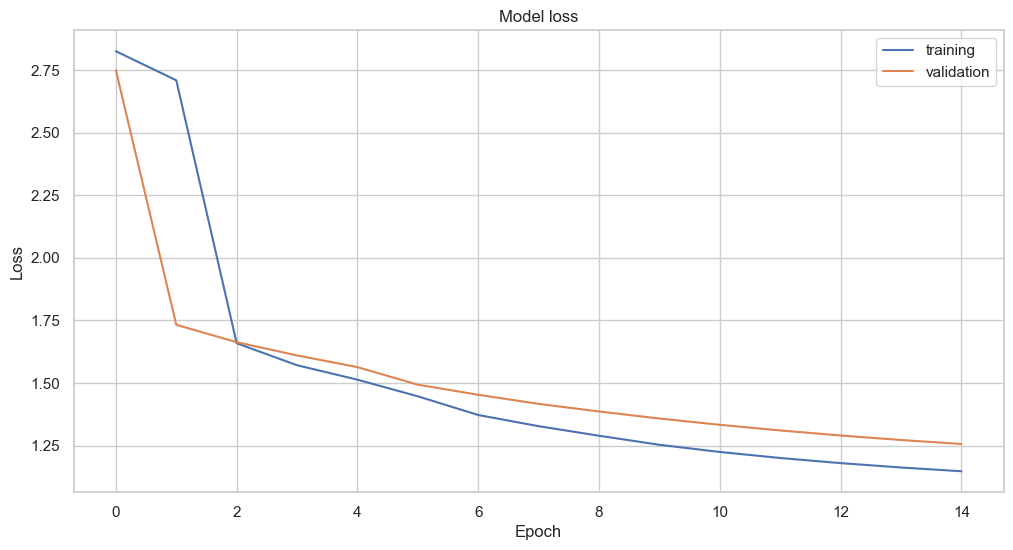

Number of features 10


In [114]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

# ighnore below
dataset = features.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
#print('dataset.shape', dataset.shape)
num_of_features = len(features.columns)
print('Number of features', num_of_features)
look_back = sequence_length

trainX shape: (102, 15, 10), trainY shape: (102,)
testX shape: (36, 15, 10), testY shape: (36,)
Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0070 - val_loss: 0.0455
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0132 - val_loss: 0.0394
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0069 - val_loss: 0.0372
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0045 - val_loss: 0.0379
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0041 - val_loss: 0.0402
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0044 - val_loss: 0.0450
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0045 - val_loss: 0.0487
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0039 - val_loss: 0.0531
Epoch 9/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0035 - val_loss: 0.0666
Epoch 10/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0035 - val_loss: 0.0847
Epoch 11/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.00

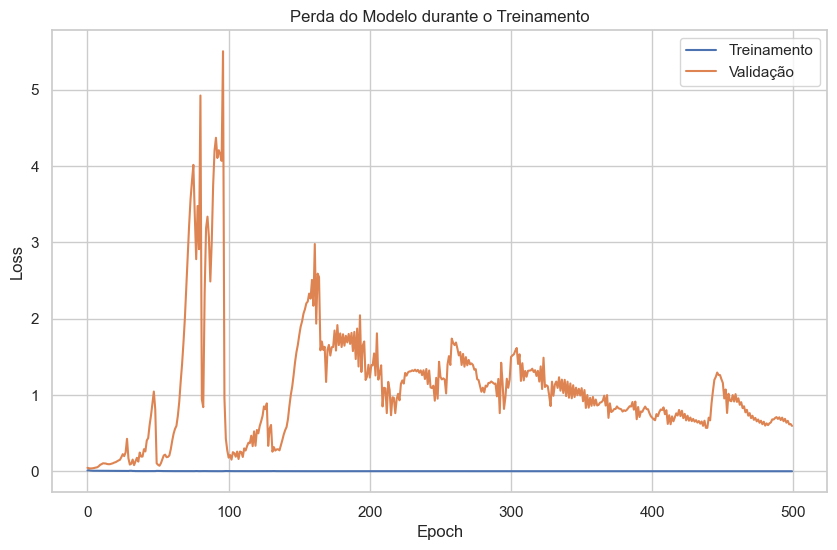

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Treino RMSE: 52561.73063331946, MAE: 21278.31474606122
Teste RMSE: 47428.72787182145, MAE: 42556.70620511852


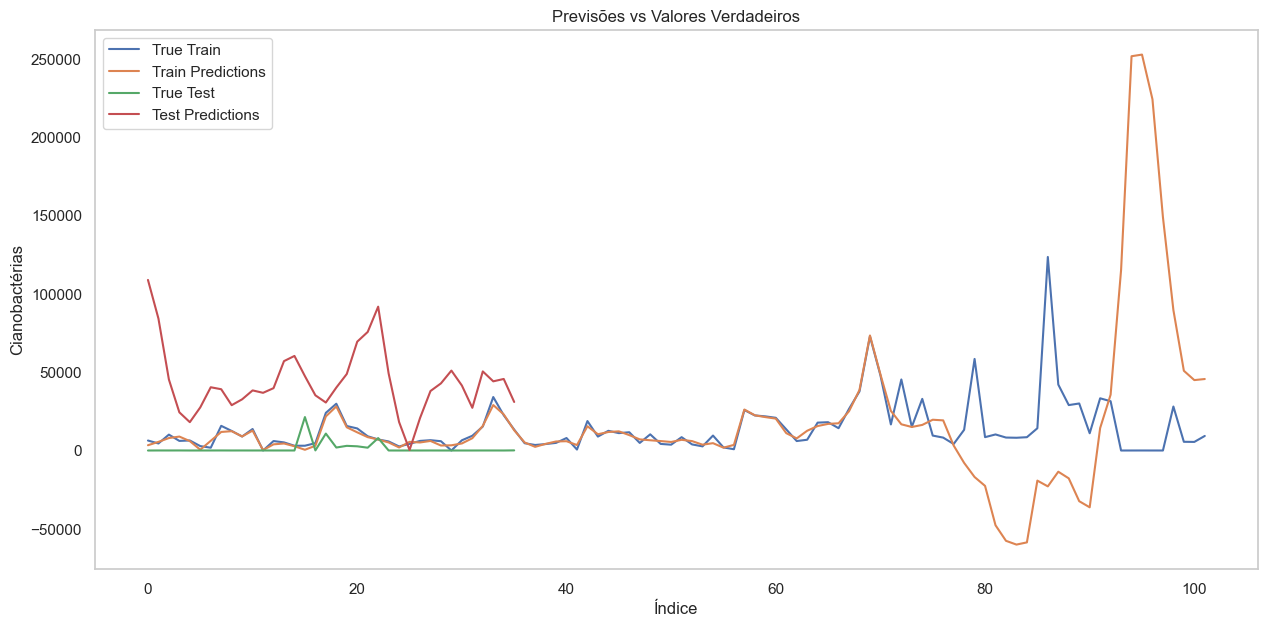

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping

# Função para criar o dataset com base no número de passos temporais (look_back)
def create_dataset(dataset, pred_col, look_back=30):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), :])  # Sequência de entradas
        dataY.append(dataset[i + look_back, pred_col])  # Valor alvo correspondente
    return np.array(dataX), np.array(dataY)

# Configuração inicial
train_size_percent = 0.7
look_back = 15  # Número de passos temporais
epochs = 500
batch_size = 16
lstm_layers = 120


# {'model_type': 'GRU', 'num_layers': 3, 'units_layer_1': 128, 'units_layer_2': 128, 'units_layer_3': 96, 'dropout_rate': 0.4, 'learning_rate': 0.006271236579232182, 'batch_size': 64, 'look_back': 35}

# Carregar os dados
MENINAS = pd.read_csv(r"C:\Users\CLIENTE\Downloads\TCC WERNER\BASES\BANCO_MENINAS.csv", sep=';')
MENINAS_F = MENINAS_FINAL.copy()

# Normalizar os dados
scaler = MinMaxScaler()
dataset = scaler.fit_transform(MENINAS_F.values)

# Identificar a coluna alvo
pred_col = MENINAS_F.columns.get_loc("Cianobactérias")

# Dividir em conjunto de treino e teste
train_size = int(len(dataset) * train_size_percent)
train, test = dataset[:train_size, :], dataset[train_size:, :]

# Criar os datasets com base no número de passos temporais
trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
testX, testY = create_dataset(test, pred_col, look_back=look_back)

# Verificar os formatos
num_of_features = dataset.shape[1]
print(f"trainX shape: {trainX.shape}, trainY shape: {trainY.shape}")
print(f"testX shape: {testX.shape}, testY shape: {testY.shape}")

# Criar o modelo LSTM
model = Sequential()
model.add(LSTM(lstm_layers, input_shape=(look_back, num_of_features)))
model.add(Dense(1))  # Saída para previsão de um único valor
model.compile(loss='mean_squared_error', optimizer='adam')

# Adicionar early stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Treinar o modelo
history = model.fit(trainX, trainY, validation_split=0.30, epochs=epochs, batch_size=batch_size, shuffle=False) # callbacks=[early_stopping])

# Plotar o histórico de treino e validação
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda do Modelo durante o Treinamento')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Preparar previsões para inversão da normalização
trainPredict_extended = np.zeros((len(trainPredict), num_of_features))
testPredict_extended = np.zeros((len(testPredict), num_of_features))
trainPredict_extended[:, pred_col] = trainPredict[:, 0]
testPredict_extended[:, pred_col] = testPredict[:, 0]

trainPredict = scaler.inverse_transform(trainPredict_extended)[:, pred_col]
testPredict = scaler.inverse_transform(testPredict_extended)[:, pred_col]

trainY_extended = np.zeros((len(trainY), num_of_features))
testY_extended = np.zeros((len(testY), num_of_features))
trainY_extended[:, pred_col] = trainY
testY_extended[:, pred_col] = testY

trainY = scaler.inverse_transform(trainY_extended)[:, pred_col]
testY = scaler.inverse_transform(testY_extended)[:, pred_col]

# Calcular métricas de erro
trainScore_RMSE = np.sqrt(mean_squared_error(trainY, trainPredict))
testScore_RMSE = np.sqrt(mean_squared_error(testY, testPredict))
trainScore_MAE = np.mean(np.abs(trainY - trainPredict))
testScore_MAE = np.mean(np.abs(testY - testPredict))

print(f"Treino RMSE: {trainScore_RMSE}, MAE: {trainScore_MAE}")
print(f"Teste RMSE: {testScore_RMSE}, MAE: {testScore_MAE}")

# Plotar as previsões
plt.figure(figsize=(15, 7))
plt.plot(trainY, label='True Train')
plt.plot(trainPredict, label='Train Predictions')
plt.plot(testY, label='True Test')
plt.plot(testPredict, label='Test Predictions')
plt.legend()
plt.title("Previsões vs Valores Verdadeiros")
plt.xlabel("Índice")
plt.ylabel("Cianobactérias")
plt.grid(False)
plt.show()

# Modelo de testes até selecionar o melhor:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import optuna
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="Do not pass an `input_shape`/`input_dim` argument to a layer.*")


# Função para criar o dataset com base no número de passos temporais (look_back)
def create_dataset(dataset, pred_col, look_back=30):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:(i + look_back), :])
        dataY.append(dataset[i + look_back, pred_col])
    return np.array(dataX), np.array(dataY)

# Função para visualizar resíduos
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred.flatten()
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(residuals)), residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Resíduos - {title}')
    plt.xlabel('Índice')
    plt.ylabel('Resíduo')
    plt.grid(False)
    plt.show()

# Carregar os dados
MENINAS = pd.read_csv(r"C:\\Users\\CLIENTE\\Downloads\\TCC WERNER\\BASES\\BANCO_MENINAS.csv", sep=';')
MENINAS.drop(columns=['DATA', 'Classe'], inplace=True)
predict_var = "Cianobactérias"

# Seleção de features
scaler = MinMaxScaler()
dataset = scaler.fit_transform(MENINAS.values)
pred_col = MENINAS.columns.get_loc(predict_var)
train_size_percent = 0.7
train_size = int(len(dataset) * train_size_percent)
train, test = dataset[:train_size, :], dataset[train_size:, :]

# Função objetivo para o Optuna
def objective(trial):
    model_type = trial.suggest_categorical('model_type', ['LSTM', 'GRU', 'Hybrid'])
    num_layers = trial.suggest_int('num_layers', 1, 3)
    units_per_layer = [trial.suggest_int(f'units_layer_{i+1}', 32, 128, step=32) for i in range(num_layers)]
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5, step=0.1)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])
    look_back = trial.suggest_int('look_back', 10, 50, step=5)

    # Atualizar o conjunto de dados com o look_back
    trainX, trainY = create_dataset(train, pred_col, look_back=look_back)
    testX, testY = create_dataset(test, pred_col, look_back=look_back)

    # Criar o modelo
    model = Sequential()
    for i, units in enumerate(units_per_layer):
        if i == 0:
            if model_type == 'LSTM':
                model.add(LSTM(units, return_sequences=(num_layers > 1), input_shape=(look_back, trainX.shape[2])))
            elif model_type == 'GRU':
                model.add(GRU(units, return_sequences=(num_layers > 1), input_shape=(look_back, trainX.shape[2])))
            elif model_type == 'Hybrid':
                model.add(LSTM(units, return_sequences=True, input_shape=(look_back, trainX.shape[2])))
                model.add(GRU(units, return_sequences=(i < num_layers - 1)))
        else:
            if model_type == 'LSTM':
                model.add(LSTM(units, return_sequences=(i < num_layers - 1)))
            elif model_type == 'GRU':
                model.add(GRU(units, return_sequences=(i < num_layers - 1)))
        model.add(Dropout(dropout_rate))

    # Camada de saída
    model.add(Dense(1))

    # Compilar o modelo
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Treinar o modelo
    model.fit(trainX, trainY, validation_split=0.2, epochs=50, batch_size=batch_size, verbose=0)

    # Fazer previsões
    preds = model.predict(testX).flatten()  # Garantir que as previsões sejam unidimensionais

    # Verificar dimensões e descartar trial inválido
    if testY.shape != preds.shape:
        raise optuna.exceptions.TrialPruned()

    # Calcular o erro
    mse = mean_squared_error(testY, preds)
    return mse


# Executar o Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# Melhor configuração
best_params = study.best_params
print("Melhores Hiperparâmetros:", best_params)

# Treinar o melhor modelo
trainX, trainY = create_dataset(train, pred_col, look_back=best_params['look_back'])
testX, testY = create_dataset(test, pred_col, look_back=best_params['look_back'])

final_model = Sequential()
for i, units in enumerate([best_params[f'units_layer_{i+1}'] for i in range(best_params['num_layers'])]):
    if i == 0:
        if best_params['model_type'] == 'LSTM':
            final_model.add(LSTM(units, return_sequences=(i < best_params['num_layers'] - 1), input_shape=(best_params['look_back'], trainX.shape[2])))
        elif best_params['model_type'] == 'GRU':
            final_model.add(GRU(units, return_sequences=(i < best_params['num_layers'] - 1), input_shape=(best_params['look_back'], trainX.shape[2])))
    else:
        if best_params['model_type'] == 'LSTM':
            final_model.add(LSTM(units, return_sequences=(i < best_params['num_layers'] - 1)))
        elif best_params['model_type'] == 'GRU':
            final_model.add(GRU(units, return_sequences=(i < best_params['num_layers'] - 1)))
    final_model.add(Dropout(best_params['dropout_rate']))

final_model.add(Dense(1))
final_model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mean_squared_error')
final_model.fit(trainX, trainY, epochs=50, batch_size=best_params['batch_size'], verbose=0)
preds = final_model.predict(testX)

# Visualizar resíduos
plot_residuals(testY, preds, title=f"Modelo {best_params['model_type']} com melhores hiperparâmetros")


[I 2025-01-03 23:01:55,089] A new study created in memory with name: no-name-de9ab428-129a-4606-a47d-33a34695deff


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


[I 2025-01-03 23:02:02,483] Trial 0 finished with value: 0.01959097157623698 and parameters: {'model_type': 'LSTM', 'num_layers': 3, 'units_layer_1': 32, 'units_layer_2': 96, 'units_layer_3': 32, 'dropout_rate': 0.30000000000000004, 'learning_rate': 0.004559361671415905, 'batch_size': 32, 'look_back': 40}. Best is trial 0 with value: 0.01959097157623698.
c:\Users\CLIENTE\anaconda3\envs\orlando\lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
[W 2025-01-03 23:02:09,583] Trial 1 failed with parameters: {'model_type': 'LSTM', 'num_layers': 2, 'units_layer_1': 128, 'units_layer_2': 128, 'dropout_rate': 0.2, 'learning_rate': 0.0002153131783531969, 'batch_size': 32, 'look_back': 50} because of the following error: Value

ValueError: math domain error

# Implementação do melhor após a pipeline:

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.0284 - val_loss: 3.9023
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 2.3131 - val_loss: 0.3288
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.3637 - val_loss: 0.0914
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0596 - val_loss: 0.0598
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0447 - val_loss: 0.0687
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0545 - val_loss: 0.0419
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0236 - val_loss: 0.0811
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0505 - val_loss: 0.1128
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0780 - val_loss: 0.0825
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0438 - val_loss: 0.0502
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0304 - val_loss: 0.0460
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.0229 - val_loss:

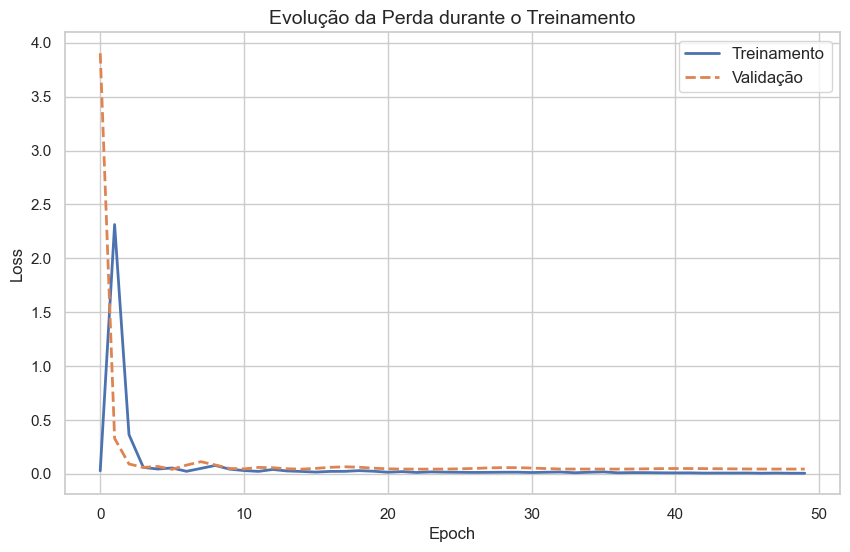

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Treino RMSE: 15728.4374, MAE: 8913.8072
Teste RMSE: 14412.4425, MAE: 11559.3590


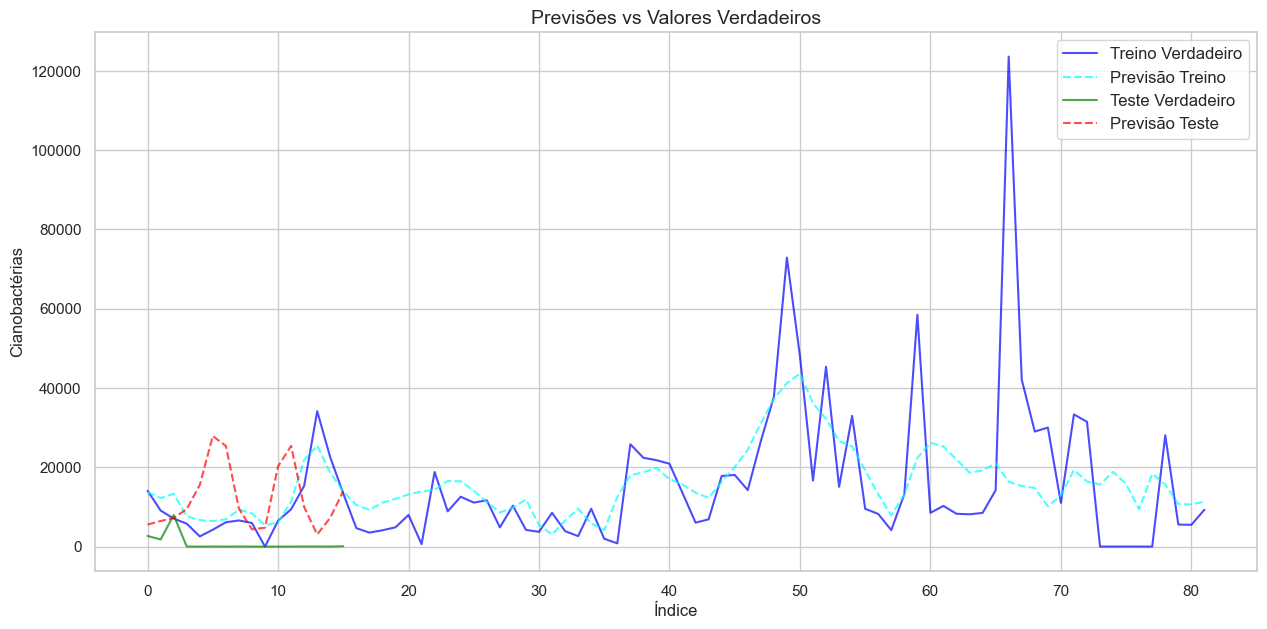

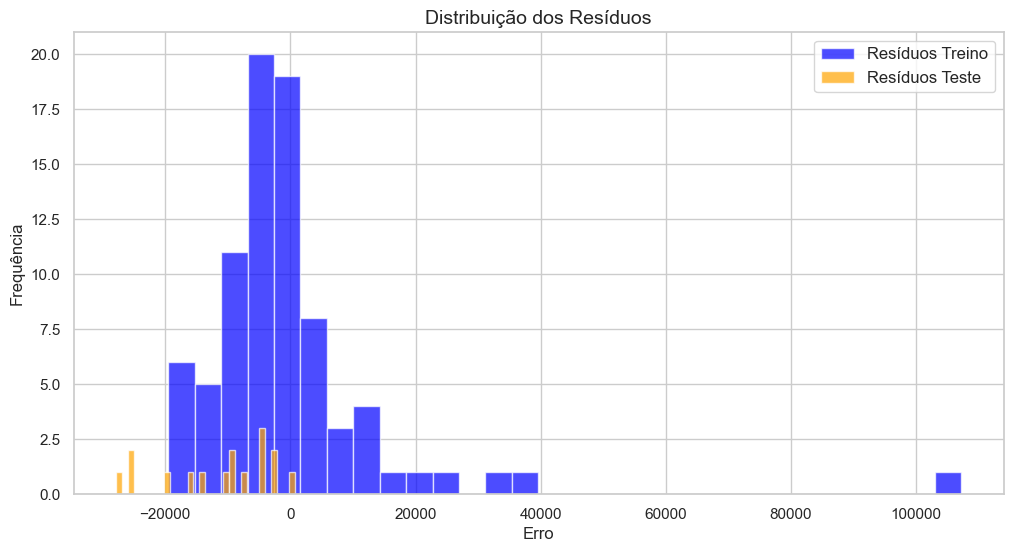

In [185]:
# Treinar novo modelo com os melhores parâmetros
trainX, trainY = create_dataset(train, pred_col, look_back=best_params['look_back'])
testX, testY = create_dataset(test, pred_col, look_back=best_params['look_back'])

final_model = Sequential()
for i, units in enumerate([best_params[f'units_layer_{i+1}'] for i in range(best_params['num_layers'])]):
    if i == 0:
        if best_params['model_type'] == 'LSTM':
            final_model.add(LSTM(units, return_sequences=(i < best_params['num_layers'] - 1), input_shape=(best_params['look_back'], trainX.shape[2])))
        elif best_params['model_type'] == 'GRU':
            final_model.add(GRU(units, return_sequences=(i < best_params['num_layers'] - 1), input_shape=(best_params['look_back'], trainX.shape[2])))
        elif best_params['model_type'] == 'Hybrid':
            final_model.add(LSTM(units, return_sequences=True, input_shape=(best_params['look_back'], trainX.shape[2])))
            final_model.add(GRU(units, return_sequences=(i < best_params['num_layers'] - 1)))
    else:
        if best_params['model_type'] == 'LSTM':
            final_model.add(LSTM(units, return_sequences=(i < best_params['num_layers'] - 1)))
        elif best_params['model_type'] == 'GRU':
            final_model.add(GRU(units, return_sequences=(i < best_params['num_layers'] - 1)))
    final_model.add(Dropout(best_params['dropout_rate']))

final_model.add(Dense(1))
final_model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mean_squared_error')

# Treinar o modelo
history = final_model.fit(trainX, trainY, validation_split=0.30, epochs=50, batch_size=best_params['batch_size'], shuffle=False, verbose=1)

# Melhorar os gráficos de treinamento e validação
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Treinamento', linewidth=2)
plt.plot(history.history['val_loss'], label='Validação', linestyle='--', linewidth=2)
plt.title('Evolução da Perda durante o Treinamento', fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(fontsize=12)
plt.grid(False)
plt.show()

# Previsões
trainPredict = final_model.predict(trainX)
testPredict = final_model.predict(testX)

# Inverter a normalização
num_of_features = train.shape[1]
trainPredict_extended = np.zeros((len(trainPredict), num_of_features))
testPredict_extended = np.zeros((len(testPredict), num_of_features))
trainPredict_extended[:, pred_col] = trainPredict[:, 0]
testPredict_extended[:, pred_col] = testPredict[:, 0]

trainPredict = scaler.inverse_transform(trainPredict_extended)[:, pred_col]
testPredict = scaler.inverse_transform(testPredict_extended)[:, pred_col]

trainY_extended = np.zeros((len(trainY), num_of_features))
testY_extended = np.zeros((len(testY), num_of_features))
trainY_extended[:, pred_col] = trainY
testY_extended[:, pred_col] = testY

trainY = scaler.inverse_transform(trainY_extended)[:, pred_col]
testY = scaler.inverse_transform(testY_extended)[:, pred_col]

# Calcular métricas de erro
trainScore_RMSE = np.sqrt(mean_squared_error(trainY, trainPredict))
testScore_RMSE = np.sqrt(mean_squared_error(testY, testPredict))
trainScore_MAE = np.mean(np.abs(trainY - trainPredict))
testScore_MAE = np.mean(np.abs(testY - testPredict))

print(f"Treino RMSE: {trainScore_RMSE:.4f}, MAE: {trainScore_MAE:.4f}")
print(f"Teste RMSE: {testScore_RMSE:.4f}, MAE: {testScore_MAE:.4f}")

# Melhorar os gráficos de previsões
plt.figure(figsize=(15, 7))
plt.plot(trainY, label='Treino Verdadeiro', alpha=0.7, color='blue')
plt.plot(trainPredict, label='Previsão Treino', alpha=0.7, color='cyan', linestyle='--')
plt.plot(testY, label='Teste Verdadeiro', alpha=0.7, color='green')
plt.plot(testPredict, label='Previsão Teste', alpha=0.7, color='red', linestyle='--')
plt.title('Previsões vs Valores Verdadeiros', fontsize=14)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Cianobactérias', fontsize=12)
plt.legend(fontsize=12)
plt.grid(False)
plt.show()

# Melhorar gráfico de resíduos
residuals_test = testY - testPredict
residuals_train = trainY - trainPredict

plt.figure(figsize=(12, 6))
plt.hist(residuals_train, bins=30, alpha=0.7, label='Resíduos Treino', color='blue')
plt.hist(residuals_test, bins=30, alpha=0.7, label='Resíduos Teste', color='orange')
plt.title('Distribuição dos Resíduos', fontsize=14)
plt.xlabel('Erro', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend(fontsize=12)
plt.grid(False)
plt.show()

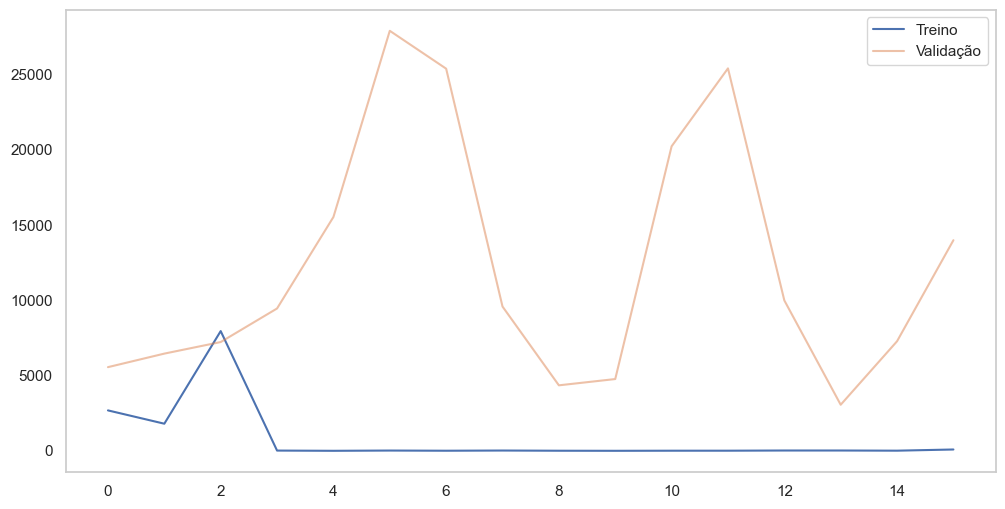

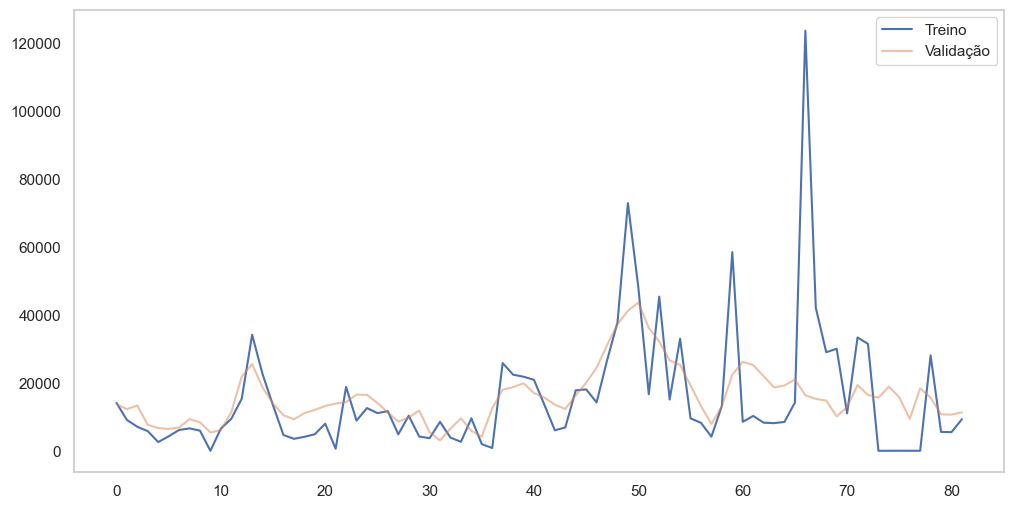

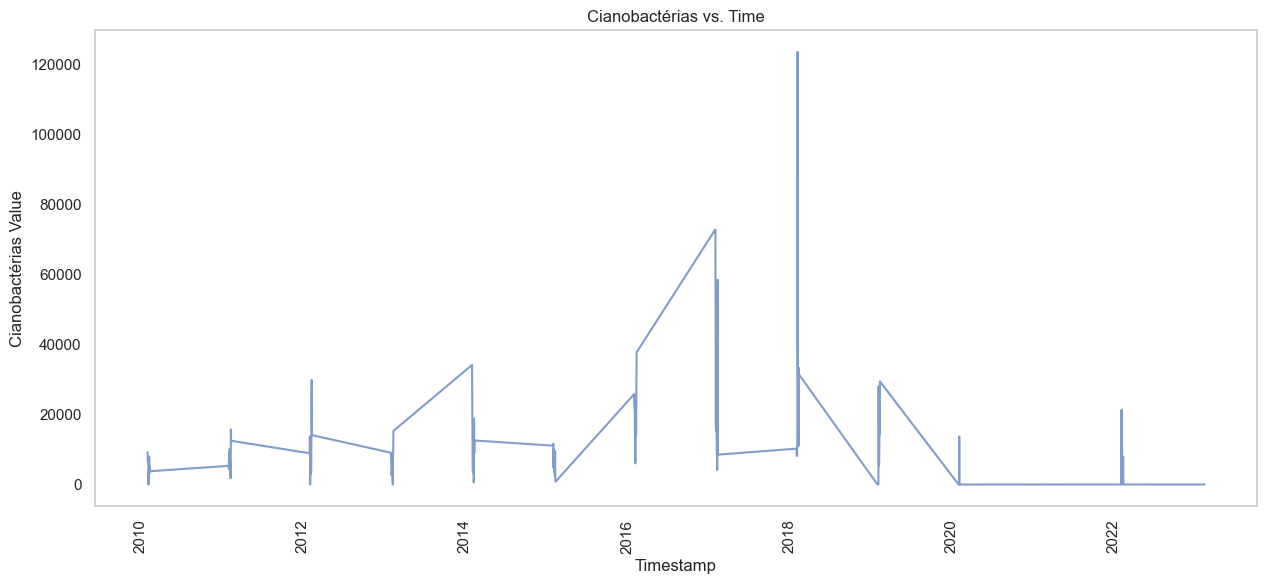

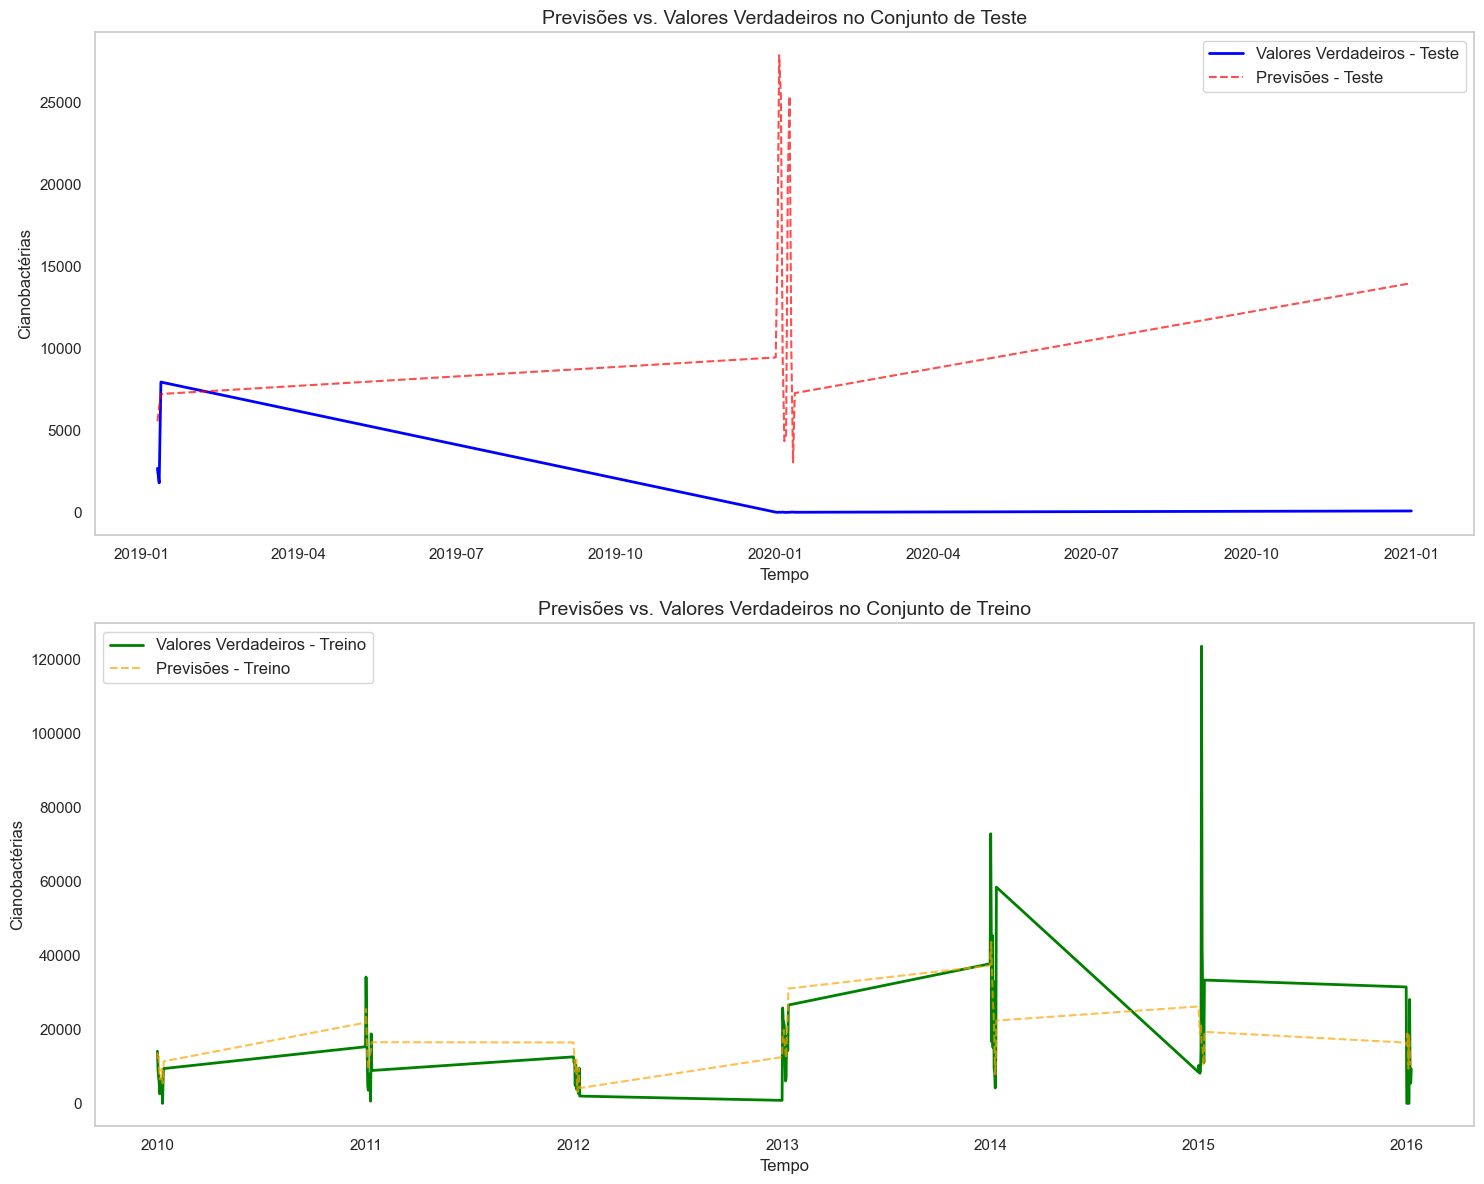

In [198]:
plt.plot(range(0,len(testY)),testY,label='Treino')
plt.plot(range(0,len(testPredict)),testPredict,label='Validação',alpha=.5)
plt.legend()
plt.grid(False)
plt.show()


plt.plot(range(0,len(trainY)),trainY,label='Treino')
plt.plot(range(0,len(trainPredict)),trainPredict,label='Validação',alpha=.5)
plt.legend()
plt.grid(False)
plt.show()

MENINAS = pd.read_csv(r"C:\\Users\\CLIENTE\\Downloads\\TCC WERNER\\BASES\\BANCO_MENINAS.csv", sep=';')
# Configurar a coluna 'DATA' como índice
MENINAS['DATA'] = pd.to_datetime(MENINAS['DATA'])
time_df3 = MENINAS.set_index('DATA')

# Gerar o gráfico
fig, ax = plt.subplots(figsize=(15, 7))
time_df3['Cianobactérias'].plot(ax=ax, rot=90, alpha=0.7)  # Certifique-se de usar uma coluna numérica
plt.xlabel('Timestamp')
plt.ylabel('Cianobactérias Value')  # Ajuste o rótulo conforme necessário
plt.title('Cianobactérias vs. Time')
plt.grid(False)
plt.show()



# Carregar os dados e configurar a coluna de tempo
MENINAS = pd.read_csv(r"C:\\Users\\CLIENTE\\Downloads\\TCC WERNER\\BASES\\BANCO_MENINAS.csv", sep=';')
MENINAS['DATA'] = pd.to_datetime(MENINAS['DATA'])
time_df3 = MENINAS.set_index('DATA')

# Gerar índices de treino e teste com base nos timestamps
timestamps = time_df3.index
train_timestamps = timestamps[:len(train)]
test_timestamps = timestamps[len(train):]

# Gerar os gráficos com timestamps
fig, ax = plt.subplots(2, 1, figsize=(15, 12))

# Gráfico para o conjunto de teste
ax[0].plot(test_timestamps[:len(testY)], testY, label='Valores Verdadeiros - Teste', color='blue', linewidth=2)
ax[0].plot(test_timestamps[:len(testPredict)], testPredict, label='Previsões - Teste', color='red', linestyle='--', alpha=0.7)
ax[0].set_title('Previsões vs. Valores Verdadeiros no Conjunto de Teste', fontsize=14)
ax[0].set_xlabel('Tempo', fontsize=12)
ax[0].set_ylabel('Cianobactérias', fontsize=12)
ax[0].legend(fontsize=12)
ax[0].grid(False)

# Gráfico para o conjunto de treino
ax[1].plot(train_timestamps[:len(trainY)], trainY, label='Valores Verdadeiros - Treino', color='green', linewidth=2)
ax[1].plot(train_timestamps[:len(trainPredict)], trainPredict, label='Previsões - Treino', color='orange', linestyle='--', alpha=0.7)
ax[1].set_title('Previsões vs. Valores Verdadeiros no Conjunto de Treino', fontsize=14)
ax[1].set_xlabel('Tempo', fontsize=12)
ax[1].set_ylabel('Cianobactérias', fontsize=12)
ax[1].legend(fontsize=12)
ax[1].grid(False)

plt.tight_layout()
plt.show()
